In [1]:
#ML Snippets
import numpy as np
import pandas as pd

data = [[1,2,3],[4,5,6],[7,8,9]]
data = np.array(data)

In [2]:
data = np.random.rand(6,6)*3
data

array([[1.23691392, 1.26598139, 1.81292007, 2.01415931, 1.87153602,
        2.98562405],
       [0.75445696, 0.95736585, 0.2428874 , 1.54887755, 2.31114727,
        0.82717088],
       [0.90697559, 0.58073798, 2.64198229, 2.02459886, 1.77226636,
        0.41312762],
       [2.82179916, 0.50143636, 2.56065491, 0.60651663, 1.71974766,
        2.88321456],
       [0.33660019, 1.62150803, 2.79162318, 1.276954  , 1.74943718,
        1.245788  ],
       [1.36761935, 2.86867982, 1.72544758, 1.08510106, 2.10606114,
        0.67789981]])

# Data Preprocessing

## Steps and Order

1. Import Data
2. Clean / Reformat Data
3. Define X and Y
4. Normalize X
5. Train/ Test/ CV Split
6. Train Model, Run K-folds, Test Set Results

## X and y

In [3]:
X, y = data[:, :-1], data[:, -1]

## Read text file via genfromtxt

In [4]:
from numpy import * # Needed for genfromtxt

# data_in = genfromtxt(fpath+'abalone.csv', delimiter=",") # in case of csv data

## Train Test Split

In [5]:
# Create 60/40 train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                    test_size=0.40, random_state=3)

# The random state is a seed value for the random number generator.

In [6]:
print(X_train.shape, y_train.shape)
print(X_train)
print(y_train)

(3, 5) (3,)
[[0.75445696 0.95736585 0.2428874  1.54887755 2.31114727]
 [1.23691392 1.26598139 1.81292007 2.01415931 1.87153602]
 [0.90697559 0.58073798 2.64198229 2.02459886 1.77226636]]
[0.82717088 2.98562405 0.41312762]


## Train Test and CV Split

In [ ]:
from sklearn.model_selection import train_test_split

# Train and Temp (Train and temp) : Train will be 60% of the entire dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# CV and Test : CV and Test will both be 50% of the temp, which is 20% and 20% of the entire dataset
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have X_train, X_cv, X_test and corresponding y_train, y_cv, y_test


## Stratified Shuffle Split

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

In [11]:

from sklearn.model_selection import StratifiedShuffleSplit

In [12]:
from sklearn.datasets import fetch_olivetti_faces
olivetti = fetch_olivetti_faces(data_home='/opt/sklearn_data')

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
train_valid_idx, test_idx = next(strat_split.split(olivetti.data, olivetti.target))
X_train_valid = olivetti.data[train_valid_idx]
y_train_valid = olivetti.target[train_valid_idx]
X_test = olivetti.data[test_idx]
y_test = olivetti.target[test_idx]

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /opt/sklearn_data


## Normalize / Scale Input Data

In [7]:
##### Normalize Input Data #######
# Normalize data using min max scaler
## We only normalize X, not X and y
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### OR #### 
# Normalize data using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform data 
#rescaledX = scaler.fit_transform(X) # this applies the scaler to the data and gives the mormalized data
scaler.fit(X) # This first out scale to the data (where can then use it later to apply it to other data such as the test data)
rescaledX = scaler.transform(X) # this applies the scaler to the data and gives the mormalized data

np.set_printoptions(precision = 3) #Setting precision for the output
print(rescaledX)

[[-6.132e-04 -4.164e-02 -1.720e-01  1.165e+00 -2.318e-01]
 [-6.166e-01 -4.275e-01 -1.976e+00  2.433e-01  1.800e+00]
 [-4.218e-01 -8.985e-01  7.808e-01  1.186e+00 -6.906e-01]
 [ 2.023e+00 -9.976e-01  6.873e-01 -1.623e+00 -9.332e-01]
 [-1.150e+00  4.029e-01  9.528e-01 -2.953e-01 -7.960e-01]
 [ 1.663e-01  1.962e+00 -2.725e-01 -6.753e-01  8.520e-01]]


## Adjusting Normalization for Test Data / New Predictions

It IS important that we normalize our X_test and X values that we may subsequently want to use for prediction.
Because or weights depend on the scaling/ normalization used for training, we need to ensure it is consistent.
This means we should use the same values used for normalization.

In [8]:
# Create a StandardScaler instance and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train) # Note that this is only fitting the scaler to the training data, it is not scaling the training data
# Tranform is the process that scales the data

# New data point
new_data_point = np.array([[2,3,4,7.0, 8.0]])  # Example new data

# Normalize the new data point using the same scaler
normalized_new_data_point = scaler.transform(new_data_point) # Here we are transforming our data using the scaler that we fit to the training data

print("Normalized New Data Point:", normalized_new_data_point)

Normalized New Data Point: [[ 5.135  7.371  2.447 23.159 25.687]]


## Binarize Data

In this method, all the values that are above the threshold are transformed into 1 and those equal to or below the threshold are transformed into 0. This method is useful when we deal with probabilities and need to convert the data into crisp values. 

Binarization is a common operation on text count data where the analyst can decide to only consider the presence or absence of a feature rather than a quantified number of occurrences for instance.

In [9]:
sample_vector = np.array([-3,-2,-1,0,1,2,3]) # Create sample vector 
# reshape sample_vector into a 1x7 matrix
sample_vector = sample_vector.reshape(1,-1)
print(sample_vector)


[[-3 -2 -1  0  1  2  3]]


In [10]:
# Simple NP Method 
threshold = 0  # Define your threshold here
binary_y_train = (y_train > threshold).astype(int)
binary_y_train

array([1, 1, 1])

In [11]:
from sklearn.preprocessing import Binarizer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Binarizer.html
# NOTE: Input needs to be a matrix, not a vector, so you should reshape any vectors with X.reshape(1, -1)

binarizer = Binarizer(threshold=0.0).fit(sample_vector) 
binaryX = binarizer.transform(sample_vector) 

print(f"Vector before binarization: {sample_vector}")
print(f"Vector after binarization: {binaryX}")

Vector before binarization: [[-3 -2 -1  0  1  2  3]]
Vector after binarization: [[0 0 0 0 1 1 1]]


In [12]:
# Ensuring your y values are binary given its a classification problem
binarizer = Binarizer(threshold=0.0).fit(y_train.reshape(-1,1)) 
binary_y_train = binarizer.transform(y_train.reshape(-1,1)) # Need to reshape as binarizer only takes 2D arrays
binary_y_test = binarizer.transform(y_test.reshape(-1,1)) 

#convert binary y back to 1D array
binary_y_train = binary_y_train.ravel()
binary_y_test = binary_y_test.ravel()

## Convert Vector of Numbers to Be A Matrix For Time Series Analysis

In [8]:
import numpy as np
data = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

# convert X to be a matrix of 5 columns (5 days of data)
X = np.array([data[i:i+5] for i in range(len(data)-5)])
# make X equal to the first 4 columns of X and y equal to the last column of X
X, y = X[:,:-1], X[:,-1]
X, y

(array([[ 1,  2,  3,  4],
        [ 2,  3,  4,  5],
        [ 3,  4,  5,  6],
        [ 4,  5,  6,  7],
        [ 5,  6,  7,  8],
        [ 6,  7,  8,  9],
        [ 7,  8,  9, 10],
        [ 8,  9, 10, 11],
        [ 9, 10, 11, 12],
        [10, 11, 12, 13]]),
 array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

# k-fold Cross Validation

In [2]:
from sklearn import datasets, linear_model

from sklearn.model_selection import cross_validate
 
from sklearn.model_selection import KFold 
from sklearn import metrics  


#Source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html
#Simulate splitting a dataset  into 5 folds
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]

y = diabetes.target[:150]
lasso = linear_model.Lasso()

#############################################
#Single metric evaluation using cross_validate
cv_results = cross_validate(lasso, X, y, cv=5)
print(f"cv_results: {cv_results}\n")

scores = cross_validate(lasso, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'), return_train_score=True)
print(f"{scores['test_neg_mean_squared_error']=}") 
print(f"{scores['train_r2']=}\n")
print(f"cv_results: {cv_results}")
#############################################

cv_results: {'fit_time': array([0.00033951, 0.        , 0.00099778, 0.00099778, 0.        ]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([0.29828675, 0.2241492 , 0.15480127, 0.25519733, 0.17108715])}

scores['test_neg_mean_squared_error']=array([-2807.16799618, -4890.37813089, -3360.65006947, -4663.03492141,
       -5152.31964346])
scores['train_r2']=array([0.32756806, 0.31459442, 0.33970628, 0.32065301, 0.27361929])

cv_results: {'fit_time': array([0.00033951, 0.        , 0.00099778, 0.00099778, 0.        ]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_score': array([0.29828675, 0.2241492 , 0.15480127, 0.25519733, 0.17108715])}


## K-fold cv for tensorflow

In [8]:
import numpy as np
from sklearn.model_selection import KFold, train_test_split
from keras.models import Sequential
from keras.layers import Dense

# First, split your data into a training and a hold-out test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to create model, required for KFold
def create_model(input_dim):
    # Define the model
    model = Sequential()
    model.add(Dense(25, input_dim=input_dim, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

# Prepare cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

##################################################
# K-fold Cross Validation model evaluation
fold_no = 1
for train, val in kfold.split(X_train, y_train):
    # train is an array of indices of the datapoints to train on
    # val is an array of indices of the datapoints for cross validation 
#################################################
    model = create_model(input_dim=X_train.shape[1])
    print(f'Training on fold {fold_no}...')

    # Fit the model
    history = model.fit(X_train[train], y_train[train], # selecting those index values from X_train and y_train to use as TRAINING data
                        validation_data=(X_train[val], y_train[val]), # selecting those index values from X_train and y_train to use as VALIDATION data
                        epochs=100,
                        verbose=0)
    
    # Generate generalization metrics
    scores = model.evaluate(X_train[val], y_train[val], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    fold_no += 1

# Finally, after choosing and training your final model, evaluate it on the test set
final_model = create_model(input_dim=X_train.shape[1])
final_model.fit(X_train, y_train, epochs=100, verbose=0)
test_scores = final_model.evaluate(X_test, y_test, verbose=0)
print(f'Test set evaluation - Loss: {test_scores[0]}, Accuracy: {test_scores[1]*100}%')


Training on fold 1...
Score for fold 1: loss of -697.5126953125; accuracy of 0.0%
Training on fold 2...
Score for fold 2: loss of -433.4169616699219; accuracy of 0.0%
Training on fold 3...
Score for fold 3: loss of -350.8194580078125; accuracy of 0.0%
Training on fold 4...
Score for fold 4: loss of -359.3729553222656; accuracy of 0.0%
Training on fold 5...
Score for fold 5: loss of -683.8095703125; accuracy of 0.0%
Test set evaluation - Loss: -870.7814331054688, Accuracy: 0.0%


- `kfold` is an instance of `KFold` from `sklearn.model_selection`, which is configured to split the data into a certain number of folds.
- `kfold.split(X_train, y_train)` returns an iterator that generates pairs of indices. These pairs are the indices for the training set and the validation set for each fold.
- Each `train` and `val` in the `for` loop are arrays of indices. `train` contains the indices of `X_train` and `y_train` that are going into making up the training set for the current fold, while `val` contains the indices of `X_train` and `y_train` that make up the validation set for the current fold.

When you use `X_train[train]` and `y_train[train]`, you are indexing `X_train` and `y_train` with the `train` indices to extract the data points that will be used for training the model in the current fold.

Similarly, `X_train[val]` and `y_train[val]` index `X_train` and `y_train` with the `val` indices to extract the data points that will be used for validating the model in the current fold.

The `model.fit()` function then takes these indexed portions of the data to train the model and validate its performance.

So, in summary:
- `train` is an array of indices for the training data in the current fold.
- `val` is an array of indices for the validation data in the current fold.
- `X_train[train]` and `y_train[train]` are the subsets of the data used for training.
- `X_train[val]` and `y_train[val]` are the subsets of the data used for validation.

# Accuracy and Results Metrics

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


## Regression Results

In [26]:
y_test = [1.1, 2, 1, 4]
y_pred = [1.1, 1.8, 1.2, 3.9]

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
# RMSE calculation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)


print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 0.02
Root Mean Squared Error: 0.15
R-squared (R2): 0.98


## Classification Results

In [17]:
# import sklearn library for classification accuracy metric
from sklearn.metrics import accuracy_score


In [13]:
y_test = [0,0,1,1]
y_pred = [0,0,0,1]

In [14]:
# Performance metrics

from sklearn.metrics import confusion_matrix
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Load the confusion matrix into a dataframe for better visualization
import pandas as pd
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred),
                                   index = ['Actual Negative','Actual Positive'],
                                   columns = ['Predicted Negative','Predicted Positive'])
display(confusion_matrix_df)


from sklearn.metrics import classification_report
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# if we want to access the indiv accuracy scores : see below for more details
report_dict = classification_report(y_test, y_pred, output_dict =True) 


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

## for our ROC curve we need to generate the y_pred probabilities from our model
# from sklearn.metrics import roc_curve, auc
# Detailed example below
# y_pred_proba = model.predict_proba(X_test)[:,1] # This gives us the probabilities for the positive class only
# roc_auc = roc_auc_score(y_test, y_pred_proba)
#print(f"ROC-AUC: {roc_auc:.2f}")


Confusion Matrix:
[[2 0]
 [1 1]]


,Predicted Negative,Predicted Positive
Actual Negative,2,0
Actual Positive,1,1



Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

Accuracy: 0.75


    Precision: This measures the accuracy of the positive predictions for each class. For example, a precision of 0.83 for class 1.0 means that 83% of the instances classified as class 1.0 are actually class 1.0.

    Recall: Also known as sensitivity, this measures the ability of the model to find all relevant instances in each class. For class 1.0, a recall of 0.72 indicates that the model correctly identified 72% of all actual class 1.0 instances.

    F1-Score: This is the harmonic mean of precision and recall, providing a balance between the two. An F1-score of 0.77 for class 1.0 suggests a good balance between precision and recall for this class.

    Support: This represents the number of true instances for each class in the dataset. For instance, there are 365 instances of class 1.0.

    Overall Analysis:
        The model performs best in classifying class 1.0, with the highest precision, recall, and F1-score.
        Class 2.0 has a decent recall but lower precision, indicating it's better at identifying all relevant instances but at the cost of including more false positives.
        Class 3.0 shows moderate performance in both precision and recall, suggesting a balanced but not highly accurate classification.
        Class 4.0 has the poorest performance, with low precision and especially low recall, indicating both a high rate of false positives and a significant number of missed true class 4.0 instances.
        The overall accuracy of the model is 0.66, meaning it correctly classifies 66% of the instances, regardless of class.

    Macro vs. Weighted Average:
        The macro average computes the metric independently for each class and then takes the average, treating all classes equally. The macro avg for precision, recall, and F1-score are relatively lower, indicating discrepancies in model performance across classes.
        The weighted average takes the support into account, giving more weight to classes with more instances. The weighted averages are higher, suggesting that the model performs better on classes with more instances.

### Confusion Matrix Details

In [22]:
y_test = [0,0,1,1]
y_pred = [0,0,0,1]

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Extract TN, FP, FN, TP
TN, FP, FN, TP = conf_matrix.ravel()
# The order of the output from sklearn is usually TN, FP, FN, TP

# Print the results
print(f"True Negatives (TN): {TN}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Positives (TP): {TP}")

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(conf_matrix, columns=['Predicted 1', 'Predicted 2'])
cm_df.index = ['Actual 1', 'Actual 2']

# Display the DataFrame
display(cm_df)

[[2 0]
 [1 1]]
True Negatives (TN): 2
False Positives (FP): 0
False Negatives (FN): 1
True Positives (TP): 1


,Predicted 1,Predicted 2
Actual 1,2,0
Actual 2,1,1


### Classification Report Details

In [21]:
y_test = [0, 0, 1, 1]  # True labels
y_pred = [0, 0, 0, 1]  # Predicted labels

# Generate the classification report : setting output_dict to True will return a dictionary of the classification report
report_dict = classification_report(y_test, y_pred, output_dict =True)

# Extract recall values for each class
recall_0 = report_dict['0']['recall']
recall_1 = report_dict['1']['recall']

# Extract accuracy and f1-score
accuracy = report_dict['accuracy']
f1_score_0 = report_dict['0']['f1-score']
f1_score_1 = report_dict['1']['f1-score']

print(classification_report(y_test, y_pred))
print()
# Print the results
print(f"Recall for class 0: {recall_0}")
print(f"Recall for class 1: {recall_1}")
print(f"Accuracy: {accuracy}")
print(f"F1-Score for class 0: {f1_score_0}")
print(f"F1-Score for class 1: {f1_score_1}")


              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4


Recall for class 0: 1.0
Recall for class 1: 0.5
Accuracy: 0.75
F1-Score for class 0: 0.8
F1-Score for class 1: 0.6666666666666666


### ROC_AUC Details

In [22]:
#Create a synthetic binary classification dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4, n_classes=2, random_state=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and train the neural network model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=1)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(5,), max_iter=1000, random_state=1)

In [23]:
## for our ROC curve we need to generate the y_pred probabilities from our model

y_pred_proba = model.predict_proba(X_test)[:,1] # This gives us the probabilities for the positive class only
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC: {roc_auc:.2f}")

ROC-AUC: 1.00


## Tensorflow Results Metrics

In [ ]:
"""
# Fit the Model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# Evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

history.history['accuracy'] ## history is the parameter storing the results of the model run: tf records results for both the train and validation data
history.history['val_accuracy'] ## history is the parameter storing the results of the model run: : tf records results for both the train and validation data

"""

# REGULARIZATION - MISSING

In [ ]:
# Three different ways to define a model using regularizers
from sklearn.linear_model import LogisticRegression
clf_l1_LR = LogisticRegression(C=0.5, penalty='l1', tol=0.01, solver='saga')
clf_l2_LR = LogisticRegression(C=0.5, penalty='l2', tol=0.01, solver='saga')
clf_en_LR = LogisticRegression(C=0.5, penalty='elasticnet', solver='saga',
                                   l1_ratio=0.5, tol=0.01)

# C is the inverse of the regularization strength, smaller values specify stronger regularization
# tol is the tolerance for stopping criteria (when loss is low enought to stop)
# saga is an extension of sgd and supports l1 and l2 regularization

In [ ]:
# L2 Regularization with Tensor Flow
from keras.regularizers import l2

model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu', kernel_regularizer= l2(0.001))) #### This is the line we add the regularizer to
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# MODELS - Basic Models Missing

## Linear Regression Models

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Example data for multifactor linear regression
# X - independent variables (e.g., hours studied, sleep hours)
# y - dependent variable (e.g., test scores)
# X has two columsn and thus two input factors/ features

X = np.array([
    [1, 3], [2, 4], [3, 2], [4, 5], [5, 6],
    [6, 7], [7, 8], [8, 4], [9, 9], [10, 5]
])
y = np.array([2.3, 4.4, 6.1, 8.2, 10.1, 12.3, 14.0, 16.2, 18.1, 20.5])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train)

# Creating the model and fitting it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients:', model.coef_)
# The mean squared error
print('Mean squared error:', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
# RMSE calculation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', rmse)

print('Coefficient of determination:', r2_score(y_test, y_pred))


[[ 5  6]
 [10  5]
 [ 2  4]
 [ 7  8]
 [ 8  4]
 [ 4  5]
 [ 1  3]
 [ 6  7]]
Coefficients: [ 2.01601678 -0.063808  ]
Mean squared error: 0.05147509975513291
Root Mean Squared Error: 0.22688124593084574
Coefficient of determination: 0.998570136117913


### SGD Regressor: Stochastic Gradient Descent

In [29]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Creating the model using SGDRegressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=0)
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
sgd_model.fit(X_train, y_train)

# Making predictions using the testing set
y_pred_sgd = sgd_model.predict(X_test)

# The coefficients
print('Coefficients:', sgd_model.coef_)
# The mean squared error
print('Mean squared error:', mean_squared_error(y_test, y_pred_sgd))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination:', r2_score(y_test, y_pred_sgd))

# RMSE calculation
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))
print('Root Mean Squared Error:', rmse_sgd)


Coefficients: [2.00709605 0.01909926]
Mean squared error: 0.02465293506369395
Coefficient of determination: 0.9993151962482307
Root Mean Squared Error: 0.15701253154985417


## Classifiers

### LogisticRegression : Binary

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
import pandas as pd

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
clf = LogisticRegression(max_iter=10000)


# Here is the only change you need for using a NN instead of logistic regression
#from sklearn.neural_network import MLPClassifier
#clf = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5,), random_state=1, solver='lbfgs')

clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Loading the confusion matrix into a DataFrame
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True Negative', 'True Positive'], 
                              columns=['Predicted Negative', 'Predicted Positive'])

print(f"{accuracy=}")
print(conf_matrix_df)

# Calculating precision and recall

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)


print(f"{precision=}, {recall=}")




accuracy=0.956140350877193
               Predicted Negative  Predicted Positive
True Negative                  39                   4
True Positive                   1                  70
precision=0.9459459459459459, recall=0.9859154929577465


### Logistic Regression : Multi Class Classification

In [44]:
from sklearn.datasets import load_digits  # Example multi-class dataset

from sklearn.linear_model import LogisticRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import pandas as pd

# Load a multi-class dataset
data = load_digits()  # This is a dataset with 10 classes (digits 0-9)
X = data.data
y = data.target

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
classifier = LogisticRegression(max_iter=10000, multi_class='multinomial')
# For multi_class = 'multinomial' the probability distribution over the various classes is modeled using a softmax function.
# Multinomial logistic regression predicts the probabilities of each class and the class with the highest probability is the final prediction.
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)

# Creating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Load the confusion matrix into a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['True 0', 'True 1', 'True 2', 'True 3', 'True 4', 'True 5', 'True 6', 'True 7', 'True 8', 'True 9'], 
                              columns=['Predicted 0', 'Predicted 1', 'Predicted 2', 'Predicted 3', 'Predicted 4', 'Predicted 5', 'Predicted 6', 'Predicted 7', 'Predicted 8', 'Predicted 9'])
display(conf_matrix_df)

# For multi-class, precision and recall can be calculated for each class and averaged
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')

# Output
accuracy, precision, recall, conf_matrix


,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
True 0,33,0,0,0,0,0,0,0,0,0
True 1,0,28,0,0,0,0,0,0,0,0
True 2,0,0,33,0,0,0,0,0,0,0
True 3,0,0,0,33,0,1,0,0,0,0
True 4,0,1,0,0,45,0,0,0,0,0
True 5,0,0,1,0,0,44,1,0,0,1
True 6,0,0,0,0,0,1,34,0,0,0
True 7,0,0,0,0,0,1,0,33,0,0
True 8,0,0,0,0,0,1,0,0,29,0
True 9,0,0,0,1,0,0,0,0,1,38


(0.9722222222222222,
 0.9735814591088425,
 0.9743702791014647,
 array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
        [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
        [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
        [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
        [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64))

### Comparing a Large Number of Different Classifiers

In [38]:
# Taken from sklearn website
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
       
        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        print(f"{name} : {score:.2f}")


Nearest Neighbors : 0.97
Linear SVM : 0.88
RBF SVM : 0.97
Gaussian Process : 0.97
Decision Tree : 0.95
Random Forest : 0.95
Neural Net : 0.90
AdaBoost : 0.93
Naive Bayes : 0.88
QDA : 0.85
Nearest Neighbors : 0.93
Linear SVM : 0.40
RBF SVM : 0.88
Gaussian Process : 0.90
Decision Tree : 0.78
Random Forest : 0.75
Neural Net : 0.88
AdaBoost : 0.82
Naive Bayes : 0.70
QDA : 0.72
Nearest Neighbors : 0.95
Linear SVM : 0.93
RBF SVM : 0.95
Gaussian Process : 0.93
Decision Tree : 0.95
Random Forest : 0.95
Neural Net : 0.95
AdaBoost : 0.95
Naive Bayes : 0.95
QDA : 0.93


## Neural Nets

## sklearn NN

In [24]:
from sklearn.neural_network import MLPClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

# import mlp regression model
from sklearn.neural_network import MLPRegressor

In [25]:
# solver = 'sgd' # Stochastic Gradient Descent
solver = 'adam' # Adam
activation = 'relu' # Rectified Linear Unit (ReLU)
# activation = 'logistic' # Logistic (sigmoid)
alpha = 0.0001 # L2 penalty (regularization term) parameter

For solver chocies, bvoth adam and sgd can be used for both regression and classification.

Stochastic Gradient Descent (SGD): Good for large datasets, but requires careful tuning of the learning rate and can benefit from momentum.

Adam: Combines advantages of AdaGrad and RMSProp and is generally robust for a wide range of problems. It adjusts the learning rate dynamically and is efficient for large datasets and high-dimensional spaces.

The activation used (relu, sigmoid, linear etc) for sklearn models are used ONLY for the HIDDEN layers. 
The model will select an appropriate action method depending on whether we've chose the mlplcassifier or mplregressor model.

### SKLearn Classification

In [26]:
# 1 Hidden layer
nn1 = MLPClassifier(hidden_layer_sizes=(8,), random_state=2, max_iter=100, activation = activation, solver=solver,  
                alpha = alpha, learning_rate_init=0.01 )
        #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

# 2 Hidden layers
nn2 = MLPClassifier(hidden_layer_sizes=(8,4), random_state=2, max_iter=100,activation = activation, solver=solver,
                alpha = alpha, learning_rate='constant', learning_rate_init=0.01)
        #hidden_layer_sizes=(hidden,hidden, hidden) would implement 3 hidden layers
 
# Train the model using the training sets
nn1.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_test = nn1.predict(X_test)
y_pred_train = nn1.predict(X_train)

print(f"{X_train.shape=}, {X_test.shape=}")
print(f"Training set predictions:\n {y_pred_train}")
print(f"Test set predictions:\n {y_pred_test}")


X_train.shape=(70, 4), X_test.shape=(30, 4)
Training set predictions:
 [1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1
 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0]
Test set predictions:
 [0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


### SKLearn Regression

In [ ]:
# 1 Hidden layer
nn1 = MLPRegressor(hidden_layer_sizes=(8,), random_state=2, max_iter=1000, activation = 'relu', solver='adam',  
                alpha = 0.1, learning_rate_init=0.01, tol=0.01 )
        #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

# Train the model using the training sets
nn1.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_test = nn1.predict(X_test)
y_pred_train = nn1.predict(X_train)

print(f"{X_train.shape=}, {X_test.shape=}")
print(f"Training set predictions:\n {y_pred_train}")
print(f"Test set predictions:\n {y_pred_test}")


## Tensor Flow

In [28]:
from keras.layers import Dense
from keras.models import Sequential

In [34]:
def build_tf_model():
    # Define model
    model = Sequential()
    model.add(Dense(25, input_dim=X_train.shape[1], activation='relu')) # Hidden layer 1: 25 neurons, shows that the input layer has X_train.shape[1] neurons
    model.add(Dense(1, activation='sigmoid')) # Output layer: 1 neuron, sigmoid activation

    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # Build the model (build it, not run it)

    model.summary() # Print model summary

    return model

model = build_tf_model()

# Fit model : Runs the model and outputs the results into history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

# Evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose=0) # The two method outputs are loss and accuracy (accuracy because we defined that as our metric)
_, test_acc = model.evaluate(X_test, y_test, verbose=0) # The two method outputs are loss and accuracy (accuracy because we defined that as our metric)
print('\nTrain Accuracy: %.3f, Test Accuracy: %.3f' % (train_acc, test_acc))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 25)                125       
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
3/3 [==============================] - 0s 53ms/step - loss: 0.9624 - accuracy: 0.3857 - val_loss: 0.8870 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9404 - accuracy: 0.3857 - val_loss: 0.8707 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9214 - accuracy: 0.3857 - val_loss: 0.8550 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 0.9020 - accuracy: 0.3714 - val_loss: 0.8398 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 0.8831 - accuracy: 0.3714 - val_loss: 0.8249 - val_accuracy: 0.4000
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.8653 - accuracy: 0.3714 - val_loss: 0.8103 - val_accuracy: 0.4000
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 0.8477 - accuracy: 0.3714 - val_loss: 0.7961 - val_accuracy: 0.4000
Epoch 8/100
3/3 [=========

## Decision Trees : scikitlearn

### Classification

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Loading a sample dataset - Iris dataset
data = load_iris()
X = data.data
y = data.target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_features="sqrt", random_state=25, min_samples_leaf=1, max_depth=20)
tree_clf.fit(X_train, y_train)

print(f"Score: {tree_clf.score(X_test, y_test)}") # this is the accuracy score

# Making predictions on the test set
y_pred = tree_clf.predict(X_test)

# Calculating the accuracy and other metrics
accuracy = accuracy_score(y_test, y_pred) # a diiferent way to get to the accuracy score
report = classification_report(y_test, y_pred)


print('Accuracy: ', accuracy)
print('Report\n', report)




Score: 1.0
Accuracy:  1.0
Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Regression

In [10]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)

# Making predictions on the test set
y_pred = tree_reg.predict(X_test)

# Calculating mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"mse: {mse:.2f}, r2: {r2:.2f}")



mse: 20.45, r2: 0.73


## AdaBoost

In [8]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=0,
                           random_state=42, n_clusters_per_class=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the AdaBoost classifier
# Using default settings: decision tree stumps as weak learners
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
"""
ada_clf = AdaBoostClassifier(
    base_estimator=decision_tree_model, n_estimators=10,
    algorithm="SAMME.R", learning_rate= 1)
"""


ada_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9

Parameters

1. **base_estimator**: This defines the type of weak learner to use. By default, AdaBoost uses decision tree stumps (i.e., `DecisionTreeClassifier(max_depth=1)`). However, you can specify any other model as the base estimator.

2. **n_estimators**: This parameter sets the number of weak learners to be used in the boosting process. A higher number of estimators can improve the model's performance but also increases the risk of overfitting and computational cost.

3. **learning_rate**: This parameter shrinks the contribution of each classifier. There is a trade-off between learning_rate and n_estimators. A smaller value of learning_rate requires a larger number of n_estimators for the same level of accuracy.

4. **algorithm**: AdaBoost supports two algorithms: `SAMME` and `SAMME.R`. The `SAMME.R` algorithm typically converges faster than `SAMME`, needing fewer boosting iterations. `SAMME.R` uses the class probabilities whereas `SAMME` uses classifications.

5. **random_state**: This controls the randomness of the algorithm. Providing a fixed random_state ensures reproducibility of the results.

Adjusting these parameters can help tailor the AdaBoost model to your specific dataset and problem. It's often useful to use techniques like grid search or random search for hyperparameter tuning to find the most effective combination of these parameters. 

Keep in mind that while more complex base estimators and a higher number of estimators might improve model performance, they also increase the risk of overfitting and the computational cost. As with any machine learning model, there's a balance to be struck between complexity, performance, and computational efficiency.

## Gradient Boosting

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston housing dataset
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingRegressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2



(6.208861361528038, 0.9153342280466539)

In [21]:
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the GradientBoostingClassifier model
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)

# Fit the model on the training data
gbc.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbc.predict(X_test)

# Calculate and print performance metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

# load the confusion matrix into a dataframe for better visualization
import pandas as pd
confusion_matrix_df = pd.DataFrame(conf_matrix,
                                   index = ['Setosa','Versicolor','Virginica'],
                                   columns = ['Setosa','Versicolor','Virginica'])
display(confusion_matrix_df)

# Create a DataFrame from the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=data.target_names, columns=data.target_names)
cm_df = pd.DataFrame(conf_matrix, columns=['Predicted 1', 'Predicted 2', 'Predicted 3'])
cm_df.index = ['Actual 1', 'Actual 2', 'Actual 3']

# Display the DataFrame
display(cm_df)


Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


,Setosa,Versicolor,Virginica
Setosa,10,0,0
Versicolor,0,8,1
Virginica,0,0,11


,Predicted 1,Predicted 2,Predicted 3
Actual 1,10,0,0
Actual 2,0,8,1
Actual 3,0,0,11


# Activation Functions

## Sigmoid

$S(x) =  1 / (1 + e^{-x})$

In [ ]:
sample_vector = np.array([-3,-2,-1,0,1,2,3]) # Create sample vector

print(f"Before sigmoid activation: {sample_vector}") # Note: We don't apply sigmoid to y, we apply it to generate y_predicted from our z values
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# All our negative input values will have a transformed value below 0.5    
# All our positive inpu values will have a transformed value above 0.5
sigmoid(sample_vector)

Before sigmoid activation: [-3 -2 -1  0  1  2  3]


array([0.047, 0.119, 0.269, 0.5  , 0.731, 0.881, 0.953])

In [ ]:
def sigmoid(x):
    s=1/(1+np.exp(-x)) # This implements the sigmoid function
    ds=s*(1-s)  # This gives the derivative 
    return s,ds
    
x=np.arange(-6,6,0.01)

s, ds = sigmoid(x)
print(s)
print(ds)

[0.002 0.002 0.003 ... 0.997 0.997 0.998]
[0.002 0.002 0.003 ... 0.003 0.003 0.002]


## Softmax

In [ ]:
a = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
print(np.exp(a))
print(np.sum(np.exp(a)))

# exp is the numpy function for the natural log e (so a to the power log e)
soft_max = np.exp(a) / np.sum(np.exp(a)) 
print(soft_max)

[ 2.718  7.389 20.086 54.598  2.718  7.389 20.086]
114.98389973429897
[0.024 0.064 0.175 0.475 0.024 0.064 0.175]


# Dropouts

In [ ]:
from keras.layers import Dropout
# model.add(Dropout(0.4)) # Dropout layer with a 40% dropout rate

In [ ]:
# WITH DROPOUTS, JUST THE ONE LINE ADDED
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# WITH DROPOUTS, JUST THE ONE IS DIFFERENT
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# One Hot Encoding

In the case of classification problems, you need a proper way to represent the class values or outcomes, especially in multi-class problems.

A one-hot encoding is a representation of categorical variables as binary vectors. The categorical values are typically mapped to integer values and then each integer value is represented as a binary vector.

In [ ]:
#Source: https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Define example
data_to_encode = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data_to_encode)
print(values)



['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']


In [ ]:
#### STEP 1 #### : CONVERT TO INTEGER VALUES

# Here we are converting cold to be 0, hot to be 1, and warm to be 2

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)

[0 0 2 0 1 1 2 0 2 1]


In [ ]:
### STEP 2 ### : ONE HOT ENCODE

onehot_encoder = OneHotEncoder(sparse=False) # sparse=False ensures we get a non-sparse matrix
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1) # Reshape to be a 2D array with 1 column
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print('One Hot Encoded')
print(onehot_encoded)

# Our first row shows the result for cold, which is 0, so we have [1,0,0]
# Our second row shows the result for cold, which is 0, so we have [1,0,0]
# Our third row shows the result for warm, which is 2, so we have [0,0,1]

One Hot Encoded
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [ ]:
# Invert first example if we want to work backwards when we get our predicitons
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print('\nInverted')
print(inverted)


Inverted
['cold']


# GRIDSEARCH

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
data_in = genfromtxt("C:/Dropbox/Variance/UNSW/ZZSC5836/raw_data/pima.csv", delimiter=",")
 
data_inputx = data_in[:,0:8] # all features 0, 1, 2, 3, 4, 5, 6, 7 
data_inputy = data_in[:,-1] # this is target - so that last col is selected from data

# split to training and test sets
x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=0.40, random_state=23)


In [ ]:
# model generation object  
mlp = MLPClassifier(max_iter=1000)

# Parameter Space
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (50,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
    }

# Search through parameter space, build models for different parameters
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
# Grid Search for MLPClassifier as the model, parameter_space as the space of parameters, n_jobs=-1 to use all processors, cv=3 for 3-fold cross validation

#clf.fit(X_train, binary_y_train)
clf.fit(x_train, y_train)

# Best parameteR set
print('Best parameters discovered:\n', clf.best_params_)

########## EVALUATION AND PREDICTION ##########
y_true, y_pred = y_test , clf.predict(x_test)
## Very interesting is the clf.predict selects the optimal parameters from the gridsearch cv results


print('\nReport results on the test set:')
print(classification_report(y_true, y_pred))


#acc_test = accuracy_score(y_pred, y_true) 

y_pred_train = clf.predict(x_train)
#acc_train = accuracy_score(y_pred_train, y_train) 

#cm = confusion_matrix(y_pred, y_true) 

Best parameters discovered:
 {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}

Report results on the test set:
              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       197
         1.0       0.56      0.42      0.48       111

    accuracy                           0.67       308
   macro avg       0.64      0.62      0.62       308
weighted avg       0.66      0.67      0.66       308



GridSearchCV:

    Exhaustive Search: It performs an exhaustive search over a specified parameter space. This means it tries every combination of the provided hyperparameter values.
    Time-Consuming: As it evaluates all possible combinations, it can be very time-consuming, especially for large datasets and complex models.
    Precision: Since it checks all combinations, it’s more likely to find the optimal parameter settings, given that the grid covers the true optimal values.
    Easy to Parallelize: Can be parallelized across multiple CPUs for efficiency.

RandomizedSearchCV:

    Random Search: It samples a given number of candidates from a parameter space with a specified distribution. Not every combination is tried but a random subset.
    Efficiency: Generally faster than GridSearchCV, as it doesn’t evaluate all combinations but rather a random sample.
    Good for Large Spaces: More suitable when the hyperparameter space is large; it can explore the space more efficiently.
    Less Precise: Might miss the optimal parameter combination, but often finds a good combination much more quickly than GridSearchCV.
    Flexibility in Distributions: Allows specifying distributions for continuous parameters rather than just fixed sets of values

# Ensembles

## Bagging Classifier : Same Model Using Bagging

In [ ]:
### BaggingClassifier
"""
Bagging, short for Bootstrap Aggregating, involves training each model in the ensemble using a randomly drawn subset of the training set. 
It typically uses the same type of algorithm for each model, though it's not a strict requirement.

For this example:
500 decision tree classifier models on the moons data set,
 where each model is trained using 100 cases randomly sampled from the training data set with replacement (for bagging). 
"""

from sklearn.ensemble import BaggingClassifier # The ensemble library we are using to do the bagging and voting
from sklearn.tree import DecisionTreeClassifier # The model we are using

from sklearn.datasets import make_moons
X_train, y_train = make_moons(n_samples=100, noise=0.25, random_state=53)

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, #n-estimators is the number of models we are building (500 decision tress in this example)
    max_samples=100, # max_samples is the number of training instance we are using for each model (100 instances in this example)
    bootstrap=True, # set to false if you want to use pasting instead of bagging
    n_jobs=-1) # Bootstrap means we are sampling with replacement
bag_clf.fit(X_train, y_train)

X_test = X_train[ : 1]
y_pred = bag_clf.predict(X_test)


## Voting Classifier for Different Models

In [1]:
### VotingClassifier
"""This method involves combining conceptually different machine learning classifiers and using a majority vote (hard voting) 
or the average predicted probabilities (soft voting) to predict the class labels."""


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier # This library does the merging of the models and the voting for an ensemble result

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Define our three models
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

# Train all three models using the ensemble library VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)


# Evaluate each model's accuracy on the test set
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))



LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.896


## Random Forest Classifier

In [13]:
# Random Forest
"""
Builds a Random Forest with 500 decision trees, each limited to maximum of 16 leaf nodes. 
The n_jobs parameter tells the Random Forest to use all available CPU cores to train and predict (n_jobs=-1).
"""

from sklearn.ensemble import RandomForestClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.metrics import accuracy_score

from sklearn.datasets import make_moons

# Generate dataset
X, y = make_moons(n_samples=200, noise=0.25, random_state=53)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rnd_clf.predict(X_test) # This gives us the predicted class for each of the 3 rows of data
print(y_pred)

# Print feature importances
for feature_index, importance in enumerate(rnd_clf.feature_importances_):
    print(f"Feature {feature_index}: {importance}")

print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

[1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1
 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0
 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0]
Feature 0: 0.4998378066205991
Feature 1: 0.5001621933794009
Accruracy Score: 0.94


### Feature Importance Random Forest

In [7]:
# Feature Importantance : Random Forest

from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris["data"], iris["target"])
# Higher scores are better and mean the feature is more important
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09064360774291347
sepal width (cm) 0.023762474497524597
petal length (cm) 0.43087388510645824
petal width (cm) 0.45472003265310373


# PCA : Dimensionality Reduction

In [5]:
# Create a sample dataset to illustrate the concept of feature importance using pca
from sklearn.datasets import make_classification

# create sample dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.3, random_state=1)


In [6]:
from sklearn.decomposition import PCA

## Specify The Number of Components

In [7]:
## Example with specificied number of components
pca = PCA(n_components=2) # If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.

X_train_2D = pca.fit_transform(X_train) # Fit the model with X AND apply the dimensionality reduction on X.
X_test_2D = pca.transform(X_test) # Apply dimensionality reduction to X_test.

#### Important Note: We apply fit_transform to the training set, but we only apply transform to the test set.
#### This is because we want to fit the PCA model to the training set and then apply the same transformation to the test set.
#### We would also only apply the transform to the CV set if we had one or any new data that we want to predict on.

print(pca.explained_variance_ratio_, ' explained_variance_ratio_') # This will be on the training data as that is we did the fit on
print("Total Explained Variance: ", sum(pca.explained_variance_ratio_)) # This will be on the training data as that is we did the fit on

print("\nShape Before Transformation: ", X_train.shape)
print("Shape After Transformation: ", X_train_2D.shape)


[0.45675886 0.28716049]  explained_variance_ratio_
Total Explained Variance:  0.7439193430029332

Shape Before Transformation:  (700, 10)
Shape After Transformation:  (700, 2)


## Example with 95% Explained Variance Ratio

In [8]:
pca = PCA(n_components=0.95) # When we input a value less than one the libarary knows we are going for a target ratio

X_train_reduced = pca.fit_transform(X_train) # Fit the model with X AND apply the dimensionality reduction on X.
X_test_reduced = pca.transform(X_test) # Apply dimensionality reduction to X_test.


print(pca.explained_variance_ratio_, ' explained_variance_ratio_')
print("Total Explained Variance: ", sum(pca.explained_variance_ratio_))

print("\nShape Before Transformation: ", X_train.shape)
print("Shape After Transformation: ", X_train_reduced.shape)


[0.45675886 0.28716049 0.12490336 0.09566679]  explained_variance_ratio_
Total Explained Variance:  0.9644894887222841

Shape Before Transformation:  (700, 10)
Shape After Transformation:  (700, 4)


### Inverse the Transformation

Note: When we inverse the transform back to its orginial dimensions, the data is not restored totally.  Some percentage of data will be lost.

In [9]:
X_recovered = pca.inverse_transform(X_train_reduced)

print("\nShape Before Transformation: ", X_train.shape)
print("Shape After Transformation: ", X_train_reduced.shape)
print("Shape After Inverse Transformation: ", X_recovered.shape)



Shape Before Transformation:  (700, 10)
Shape After Transformation:  (700, 4)
Shape After Inverse Transformation:  (700, 10)


### Plot the Explained Variance as a function of the number of dimensions

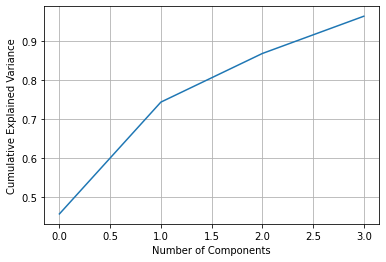

In [10]:
# Plot the explained variance as a function of the number of dimensions
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


# K-Means Clustering

In [ ]:
# Common imports
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.metrics import silhouette_score


## Blob Example

In [ ]:
# Sample data: 2D points
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

k = 2 # Number of clusters
# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(X)

# Predicting the cluster labels
labels = kmeans.predict(X)

# Centroids of the clusters
centroids = kmeans.cluster_centers_

print('kmeans.inertia_: ', kmeans.inertia_)
print('kmeans.score(X): ', kmeans.score(X) )
print('silhouette_score', silhouette_score(X, labels, metric='euclidean'))


# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title("K-Means Clustering")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
# Add a legend
plt.legend(["Points", "Centroids"])

plt.show()

In [ ]:
X

In [ ]:
print("Number of Clusters: ", k)
print("Labels/ Predictions: ", y_pred)
print("Centroids: ", centroids)

## Combining PCA and K-Means For Customer Segmentation

In [ ]:
### Standard K-Means On Customer Dataset

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


kmeans.inertia_:  3260.3333333333335
kmeans.score(X):  -3260.3333333333335
silhouette_score 0.35714922812639216


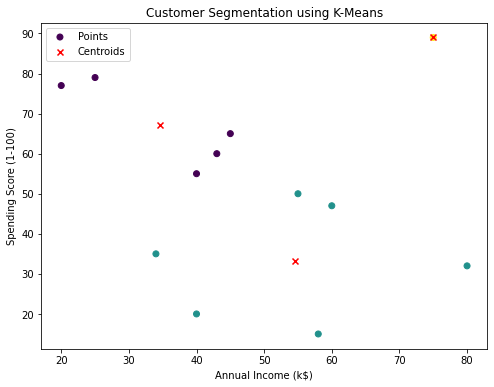

In [2]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score


# Sample Data: Annual Income in thousands and Spending Score
X = np.array([[25, 79], [34, 35], [40, 55],
              [60, 47], [75, 89], [80, 32],
              [20, 77], [58, 15], [45, 65],
              [55, 50], [40, 20], [43, 60]])

n_clusters = 3
# Applying K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

print('kmeans.inertia_: ', kmeans.inertia_)
print('kmeans.score(X): ', kmeans.score(X) )
print('silhouette_score', silhouette_score(X, labels, metric='euclidean'))


# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
# Add a legend
plt.legend(["Points", "Centroids"])
plt.show()

In [ ]:
## Applying PCA to reduce the number of dimensions to 2 and then applying K-Means clustering

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


kmeans_pca.inertia_:  3260.333333333333
kmeans_pca.score(reduced_data):  -3260.333333333333
silhouette_score 0.3571492281263921


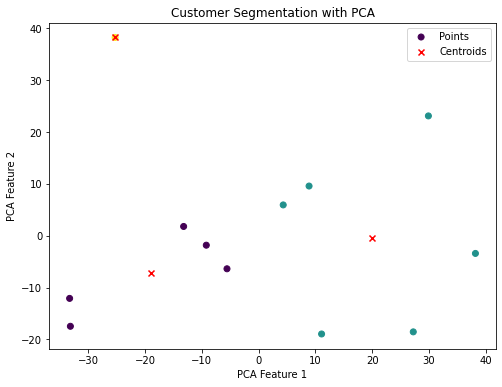

In [3]:
from sklearn.decomposition import PCA

# Suppose 'X' is your dataset with four features
# Apply K-Means clustering (assuming you've already done this)

########     PCA     ########

# Use PCA to reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
# if we have a test set we would only apply the transform (not fit and transform) to the test set
# reduced_data_test = pca.transform(X_test)

#########   K-Means    ########

# Apply K-Means on the reduced data
kmeans_pca = KMeans(n_clusters=3, random_state=0).fit(reduced_data)
labels_pca = kmeans_pca.predict(reduced_data)
centroids_pca = kmeans_pca.cluster_centers_

print('kmeans_pca.inertia_: ', kmeans_pca.inertia_)
print('kmeans_pca.score(reduced_data): ', kmeans_pca.score(reduced_data))
print('silhouette_score', silhouette_score(reduced_data, labels_pca, metric='euclidean'))


# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_pca, cmap='viridis', marker='o')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='x')
plt.title("Customer Segmentation with PCA")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.legend(["Points", "Centroids"])
plt.show()

# PLOTS

In [ ]:
import matplotlib.pyplot as plt

## Plotting error/ accuracy vs number of epochs

Sometimes also referred to as error over time.

Can use for any model that outputs an error for each epoch which definitely includes those done from scratch

y axis is the error
x axis is the number of epochs

So we see how the error falls as we run more iterations.
It also shows how quickly and how smoothly the model converges

In [ ]:
# To get error/ loss values for sklearn MLPClassifier (Classification NeuralNetwork)
loss_values = nn1.loss_curve_
loss_values[:5]

[1.1714497703163476,
 1.1274429632405703,
 1.085163382576289,
 1.044768479482754,
 1.00640039131089]

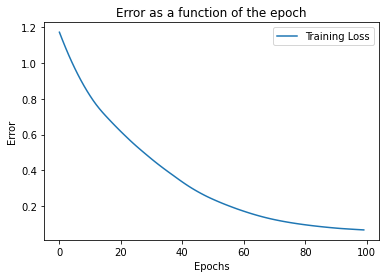

In [ ]:
# Access the loss_curve_ attribute to retrieve the loss at each iteration
loss_values = nn1.loss_curve_

# Plot the loss function over epochs
import matplotlib.pyplot as plt
plt.plot(loss_values, label='Training Loss')
plt.title('Error as a function of the epoch')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.show()

In [ ]:
max_iter = 250
train_accuracies = []
test_accuracies = []

for iteration in range(1, max_iter+1):

    if iteration % 50 == 0:
        print(f"Iteration: {iteration}")
    #random_state = 10 * run_number

    clf = MLPClassifier(hidden_layer_sizes=(20,20), 
                            learning_rate_init=0.01, 
                            solver='sgd', 
                            activation = 'relu',
                            max_iter=iteration, 
                            random_state=60
                            )

    clf.fit(X_train, y_train)

    # Predictions
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_iter + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, max_iter + 1), test_accuracies, label='Test Accuracy')
plt.title('Accuracy vs. Number of Iterations for MLPClassifier')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('bias_variance_plot.png')
plt.show()

IndentationError: unexpected indent (915319529.py, line 4)

In [ ]:
# For tensor flow

"""

# Fit model : This runs the models and stores the results we want to plot in the history variable
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=4000, verbose=0)

# Evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0) # The two method outputs are loss and accuracy (if we define a metric as other than accuracy, then metric fills the second variable)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# Plot history
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.savefig('nodp.png')

"""